In [12]:
import sys
sys.path.append('../../')
from aml_project import utils
import pickle
import numpy as np
import scipy.signal as sg
import biosppy.signals.ecg as ecg
import pandas as pd
from tqdm import tqdm

In [5]:
%%time
X = pd.read_csv('data/X_train.csv')

CPU times: user 37.8 s, sys: 1.29 s, total: 39.1 s
Wall time: 39.7 s


In [6]:
%%time
X_test = pd.read_csv('data/X_test.csv')

CPU times: user 25.2 s, sys: 641 ms, total: 25.9 s
Wall time: 26.2 s


In [45]:
%%time
y = pd.read_csv('data/y_train.csv')

CPU times: user 7.29 ms, sys: 4.68 ms, total: 12 ms
Wall time: 11.5 ms


In [267]:
sampling_rate = 300
tol= 0.01
thresh=0.2

In [268]:
def plot_signal(data, idx, titles=[]):
    import matplotlib.pyplot as plt
    if type(idx) == int:
        idx = range(idx)
        
    width = 20
    ncols = 1
    if len(data.shape) > 2:
        ncols = 5
        width = 2
        
    nrows = len(idx) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*width, nrows*5))
    if len(idx) > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    for i, ax in enumerate(axes):
        if len(data.shape) > 2:
            ax.imshow(data[i][0])
        else:
            measurements = data.iloc[i].dropna().to_numpy(dtype='float32')
            #measurements = measurements[0:-1:10]
            measurements /= 1000
            seconds = np.arange(0, len(measurements)) / 30
            ax.plot(seconds, measurements)
        if len(titles) > 0:
            ax.set_title(titles[idx[i]])

In [302]:
def preprocess(data):
    normalized_data = []
    for signal in tqdm(data.values):
        rpeaks = ecg.engzee_segmenter(signal, sampling_rate, threshold=thresh)['rpeaks']
        
        # filtering uses a 200-ms width median filter and 600-ms width median filter
        baseline = sg.medfilt(sg.medfilt(signal, int(0.2 * sampling_rate) - 1), int(0.6 * sampling_rate) - 1)

        filtered_signal = signal - baseline
        if filtered_signal.sum() == 0:
            filtered_signal = signal

        # remove non-beat labels
        #indices = [i for i, label in enumerate(labels) if label not in invalid_labels]
        #r_peaks, labels = r_peaks[indices], labels[indices]

        # align r-peaks
        #newR = []
        #for rpeak in rpeaks:
        #    rleft = np.maximum(rpeak - int(tol * sampling_rate), 0)
        #    rright = np.minimum(rpeak + int(tol * sampling_rate), len(filtered_signal))
        #    newR.append(rleft + np.argmax(filtered_signal[rleft:rright]))
        #rpeaks = np.array(newR, dtype="int")

        # remove inter-patient variation
        normalizer = pd.DataFrame(filtered_signal[rpeaks]).dropna(axis=0).mean().values
        normalized_signal = filtered_signal / normalizer
        normalized_data.append(normalized_signal)
    return np.stack(normalized_data, axis=0)

In [303]:
%%time

X_clean = preprocess(X)

100%|██████████| 5117/5117 [46:59<00:00,  1.82it/s]


CPU times: user 47min 4s, sys: 16.1 s, total: 47min 20s
Wall time: 47min


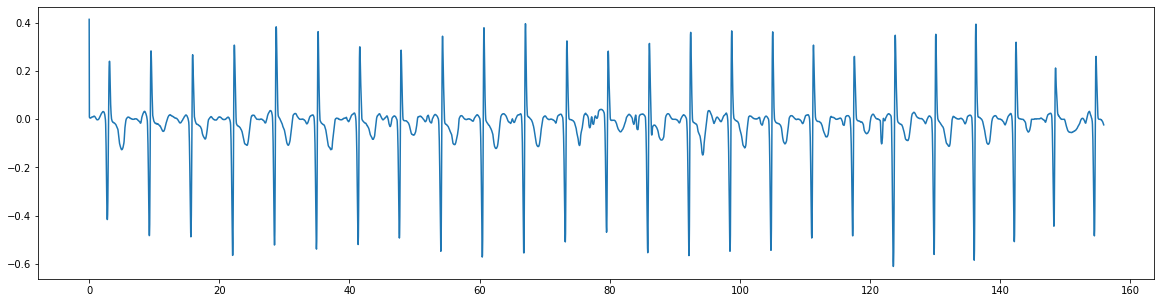

In [271]:
plot_signal(pd.DataFrame([filtered_signal]),1)

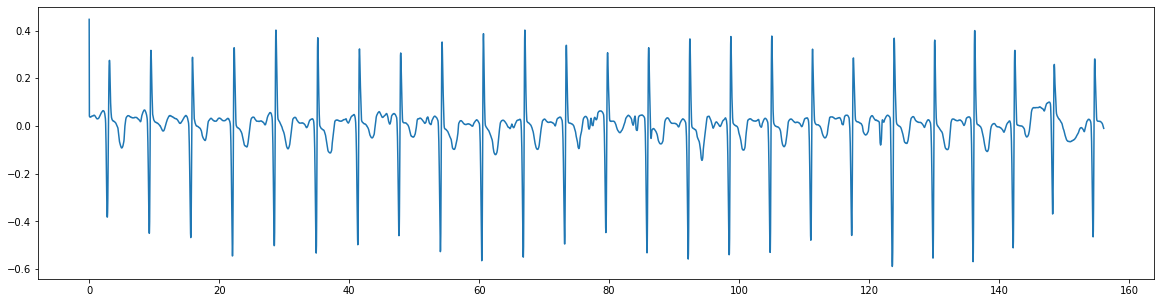

In [245]:
plot_signal(X.iloc[447:448], 1)

In [243]:
X_clean_samples = preprocess(X.iloc[[ 447,  579,  593,  955, 1135, 1247, 1383, 2931, 3009, 3145, 3519,
        4025, 4340, 4625, 4684, 4688, 4693, 4871]])

  6%|▌         | 1/18 [00:00<00:11,  1.45it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[32. 32. 32. ...  0.  0.  0.]
[415.   9.   7. ...  nan  nan  nan]
[nan]


 11%|█         | 2/18 [00:01<00:10,  1.56it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[579.  26.  25. ...  nan  nan  nan]
[nan]


 17%|█▋        | 3/18 [00:01<00:09,  1.60it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[ 593. -128.  -99. ...   nan   nan   nan]
[nan]


 22%|██▏       | 4/18 [00:02<00:08,  1.61it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[ 955. -228. -239. ...   nan   nan   nan]
[nan]


 28%|██▊       | 5/18 [00:03<00:07,  1.64it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[1135. -189. -203. ...   nan   nan   nan]
[nan]


 33%|███▎      | 6/18 [00:03<00:07,  1.68it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[1247. -282. -285. ...   nan   nan   nan]
[nan]


 39%|███▉      | 7/18 [00:04<00:06,  1.66it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[1383.   55.   41. ...   nan   nan   nan]
[nan]


 44%|████▍     | 8/18 [00:05<00:06,  1.54it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[2931.  -72.  -73. ...   nan   nan   nan]
[nan]


 50%|█████     | 9/18 [00:05<00:05,  1.79it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[3009.   56.   56. ...   nan   nan   nan]
[nan]


 56%|█████▌    | 10/18 [00:05<00:04,  1.77it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[  0. -62. -62. ...   0.   0.   0.]
[3145.   -7.   -8. ...   nan   nan   nan]
[nan]


 61%|██████    | 11/18 [00:06<00:03,  1.76it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[3519.  -62.  -59. ...   nan   nan   nan]
[nan]


 67%|██████▋   | 12/18 [00:07<00:03,  1.74it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[  0. -88. -89. ...   0.   0.   0.]
[4025.  -13.  -10. ...   nan   nan   nan]
[nan]


 72%|███████▏  | 13/18 [00:07<00:03,  1.63it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[41. 41. 41. ...  0.  0.  0.]
[4299.   12.   13. ...   nan   nan   nan]
[nan]


 78%|███████▊  | 14/18 [00:08<00:02,  1.66it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[26. 26. 26. ...  0.  0.  0.]
[4599.  101.  101. ...   nan   nan   nan]
[nan]


 83%|████████▎ | 15/18 [00:08<00:01,  1.70it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[4684.   16.   20. ...   nan   nan   nan]
[nan]


 89%|████████▉ | 16/18 [00:09<00:01,  1.69it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[ 4688. -1696. -1377. ...    nan    nan    nan]
[nan]


 94%|█████████▍| 17/18 [00:10<00:00,  1.67it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[4693. -107. -103. ...   nan   nan   nan]
[nan]


100%|██████████| 18/18 [00:10<00:00,  1.67it/s]

(0,)
Empty DataFrame
Columns: [0]
Index: []
[0. 0. 0. ... 0. 0. 0.]
[4871.  299.  295. ...   nan   nan   nan]
[nan]


In [304]:
nan_idx_train = np.where(np.isnan(X_clean).all(axis=1))
nan_idx_train

(array([], dtype=int64),)

In [301]:
X_clean

(array([5116.,  130.,   11., ...,   nan,   nan,   nan]),
 array([ 230,  359,  538,  728,  885, 1061, 1238, 1416, 1586, 1763, 1937,
        2160, 2284, 2459, 2633, 2807, 2974, 3147, 3317, 3486, 3649, 3814,
        3976, 4174, 4296, 4462, 4628, 4798, 4978, 5158, 5345, 5542, 5745,
        5946, 6190, 6338, 6533, 6725, 6914, 7138, 7278, 7459, 7636, 7811,
        8032, 8163, 8347]))

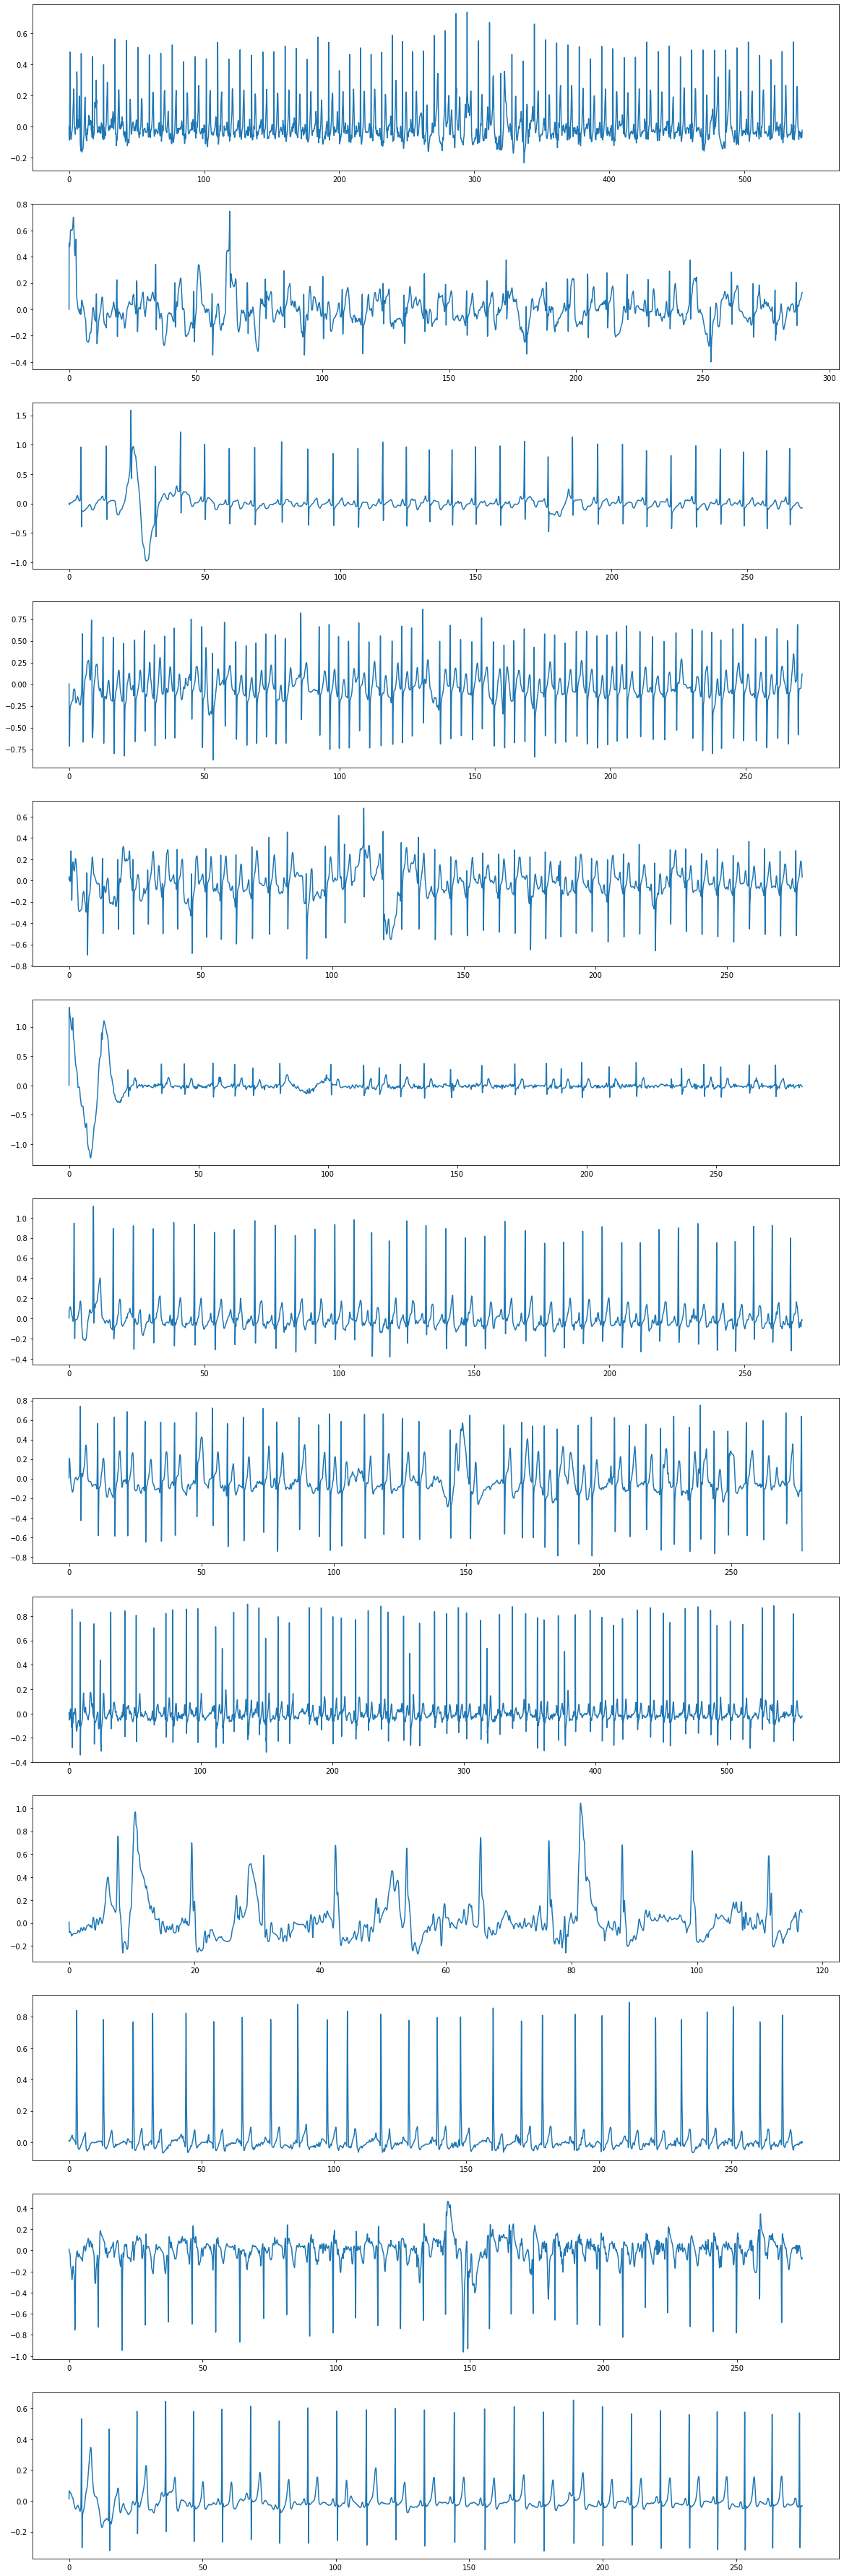

In [199]:
plot_signal(X, 13)


In [143]:
X_clean[12], y.iloc[12], len(X.iloc[12].dropna())

(array([nan, nan, nan, ..., nan, nan, nan]),
 id    12
 y      0
 Name: 12, dtype: int64,
 8244)

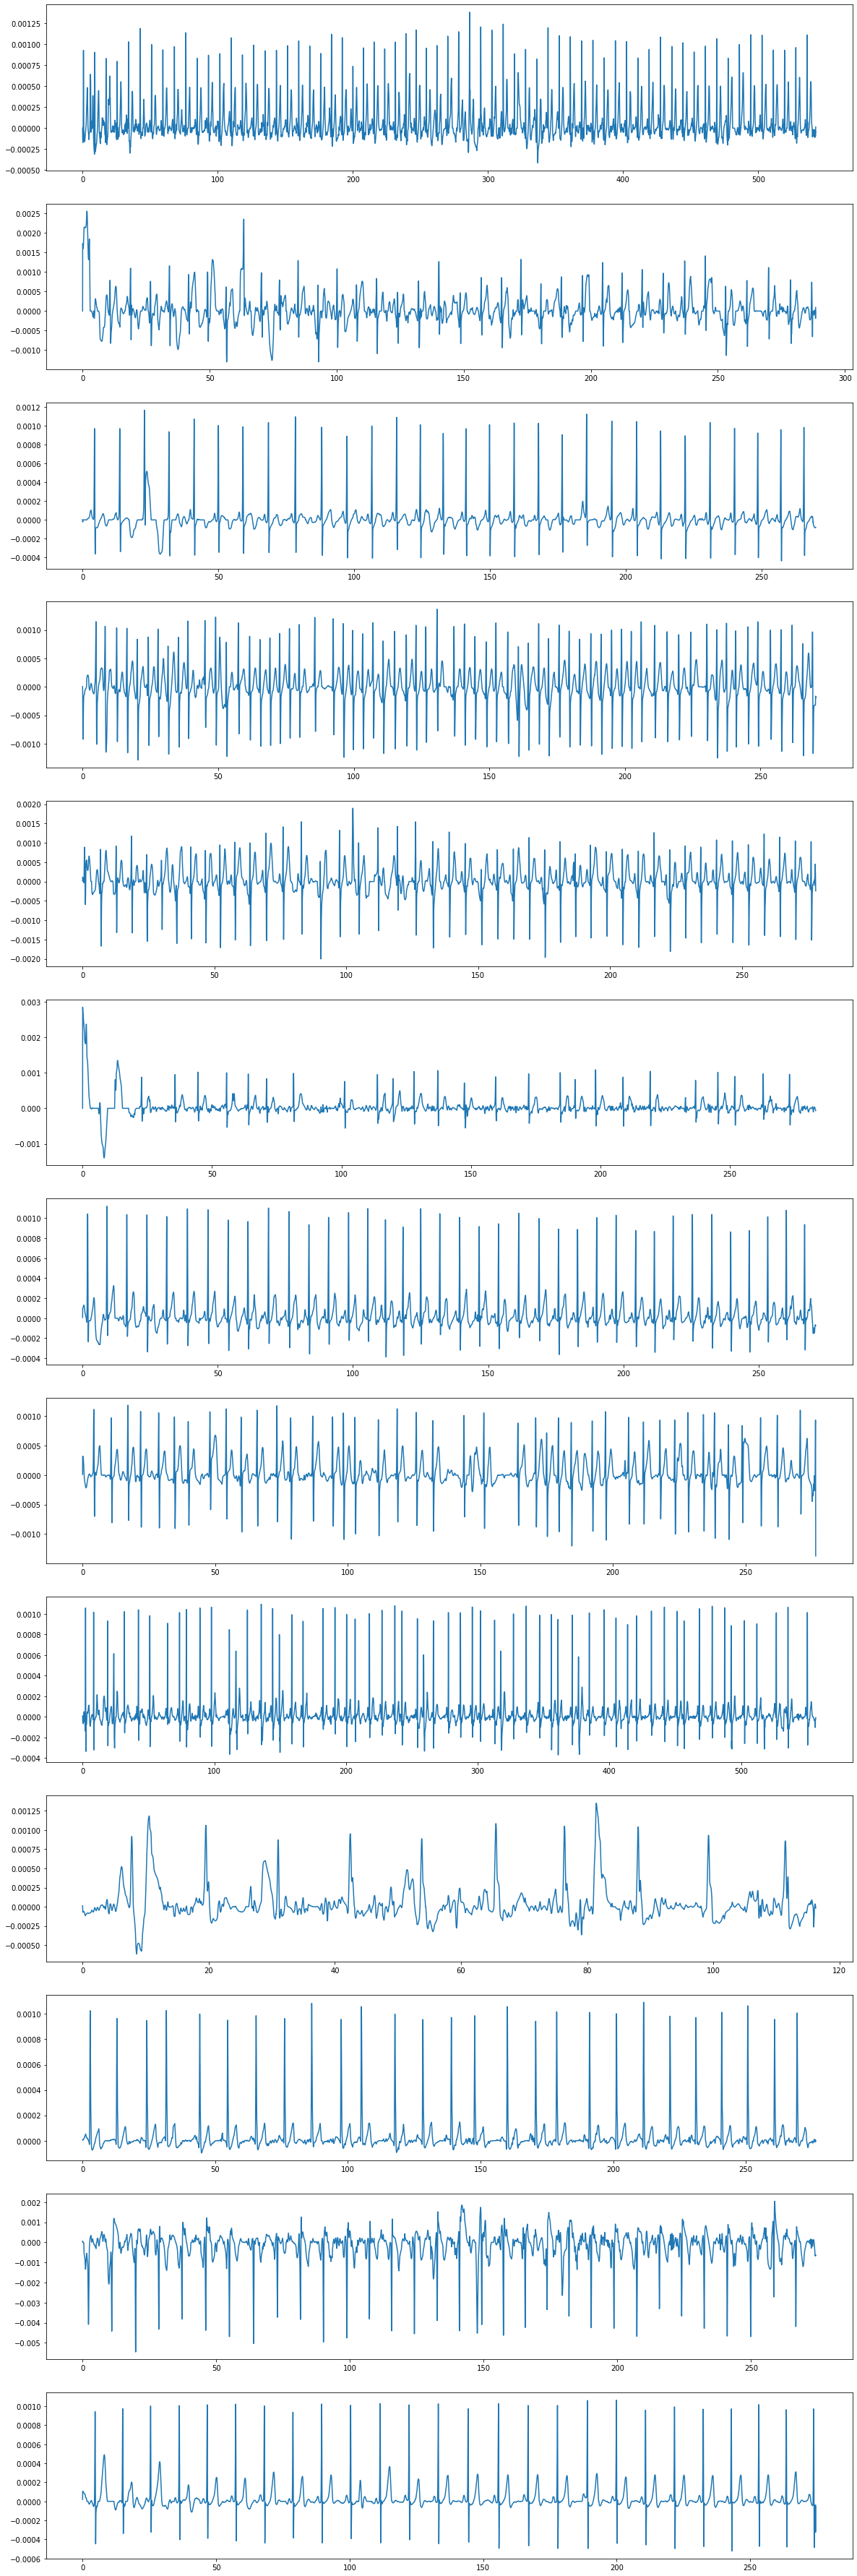

In [200]:
plot_signal(pd.DataFrame(X_clean), 13)

In [305]:
%%time
X_test_clean = preprocess(X_test)

100%|██████████| 3411/3411 [31:18<00:00,  1.82it/s]


CPU times: user 31min 15s, sys: 6.96 s, total: 31min 22s
Wall time: 31min 19s


In [306]:
nan_idx_test = np.where(np.isnan(X_test_clean).all(axis=1))
nan_idx_test

(array([], dtype=int64),)

In [316]:
a = np.array([[1, 2, 3], [3, 4, 5]])
a[:, ::2]

array([[1, 3],
       [3, 5]])

In [318]:
X_clean_sampled = X_clean[:, ::2]
X_test_clean_sampled = X_clean[:, ::2]

In [319]:
pd.DataFrame(X_clean_sampled).to_csv('data/X_train_normalized.csv')
pd.DataFrame(X_test_clean_sampled).to_csv('data/X_test_normalized.csv')